In [70]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data 
!pip install pandas==0.25

In [71]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [72]:
from sklearn import preprocessing
data = pd.read_csv('/content/beijing_train.csv')
data.dropna(inplace=True)
data.head()

REF_NO  year  month  day  hour   PM2.5    PM10      SO2      NO2        CO  \
0       1  2013      3    1     0 4.00000 4.00000  4.00000  7.00000 300.00000   
1       2  2013      3    1     1 8.00000 8.00000  4.00000  7.00000 300.00000   
2       3  2013      3    1     2 7.00000 7.00000  5.00000 10.00000 300.00000   
3       4  2013      3    1     3 6.00000 6.00000 11.00000 11.00000 300.00000   
4       5  2013      3    1     4 3.00000 3.00000 12.00000 12.00000 300.00000   

        O3     TEMP       PRES      DEWP    RAIN   wd    WSPM       station  
0 77.00000 -0.70000 1023.00000 -18.80000 0.00000  NNW 4.40000  Aotizhongxin  
1 77.00000 -1.10000 1023.20000 -18.20000 0.00000    N 4.70000  Aotizhongxin  
2 73.00000 -1.10000 1023.50000 -18.20000 0.00000  NNW 5.60000  Aotizhongxin  
3 72.00000 -1.40000 1024.50000 -19.40000 0.00000   NW 3.10000  Aotizhongxin  
4 72.00000 -2.00000 1025.20000 -19.50000 0.00000    N 2.00000  Aotizhongxin

In [73]:

label_encoder = preprocessing.LabelEncoder()
data['wd'] = label_encoder.fit_transform(data['wd'])
data['station'] = label_encoder.fit_transform(data['station'])




In [115]:
data_op_ori = pd.read_csv('/content/beijing_test.csv')
data_ori = pd.read_csv('/content/beijing_train.csv')

In [74]:
data_op = pd.read_csv('/content/beijing_test.csv')



data_op['wd'] = label_encoder.fit_transform(data_op['wd'])
data_op['station'] = label_encoder.fit_transform(data_op['station'])


In [75]:
data.head(10)

REF_NO  year  month  day  hour   PM2.5    PM10      SO2      NO2        CO  \
0       1  2013      3    1     0 4.00000 4.00000  4.00000  7.00000 300.00000   
1       2  2013      3    1     1 8.00000 8.00000  4.00000  7.00000 300.00000   
2       3  2013      3    1     2 7.00000 7.00000  5.00000 10.00000 300.00000   
3       4  2013      3    1     3 6.00000 6.00000 11.00000 11.00000 300.00000   
4       5  2013      3    1     4 3.00000 3.00000 12.00000 12.00000 300.00000   
5       6  2013      3    1     5 5.00000 5.00000 18.00000 18.00000 400.00000   
6       7  2013      3    1     6 3.00000 3.00000 18.00000 32.00000 500.00000   
7       8  2013      3    1     7 3.00000 6.00000 19.00000 41.00000 500.00000   
8       9  2013      3    1     8 3.00000 6.00000 16.00000 43.00000 500.00000   
9      10  2013      3    1     9 3.00000 8.00000 12.00000 28.00000 400.00000   

        O3     TEMP       PRES      DEWP    RAIN  wd    WSPM  station  
0 77.00000 -0.70000 1023.00000 -18.80000 0.00000   6 4.40000        0  
1 77.00000 -1.10000 1023.20000 -18.20000 0.00000   3 4.70000        0  
2 73.00000 -1.10000 1023.50000 -18.20000 0.00000   6 5.60000        0  
3 72.00000 -1.40000 1024.50000 -19.40000 0.00000   7 3.10000        0  
4 72.00000 -2.00000 1025.20000 -19.50000 0.00000   3 2.00000        0  
5 66.00000 -2.20000 1025.60000 -19.60000 0.00000   3 3.70000        0  
6 50.00000 -2.60000 1026.50000 -19.10000 0.00000   5 2.50000        0  
7 43.00000 -1.60000 1027.40000 -19.10000 0.00000   6 3.80000        0  
8 45.00000  0.10000 1028.30000 -19.20000 0.00000   6 4.10000        0  
9 59.00000  1.20000 1028.50000 -19.30000 0.00000   3 2.60000        0

In [127]:
data_ori.groupby("station").sum()

REF_NO      year   month     day    hour         PM2.5  \
station                                                                    
Aotizhongxin   566110776  67786056  226632  529896  386952 2693141.30000   
Changping      566110776  67786056  226632  529896  386952 2325708.20000   
Dingling       566110776  67786056  226632  529896  386952 2166259.90000   
Dongsi         566110776  67786056  226632  529896  386952 2814224.10000   
Guanyuan       566110776  67786056  226632  529896  386952 2730033.80000   
Gucheng        566110776  67786056  226632  529896  386952 2744562.20000   
Huairou        566110776  67786056  226632  529896  386952 2271054.00000   
Nongzhanguan   566110776  67786056  226632  529896  386952 2780055.00000   
Shunyi         566110776  67786056  226632  529896  386952 2580792.70000   
Tiantan        566110776  67786056  226632  529896  386952 2687998.80000   
Wanliu         566110776  67786056  226632  529896  386952 2759924.90000   
Wanshouxigong  566110776  67786056  226632  529896  386952 2773167.50000   

                       PM10          SO2           NO2             CO  \
station                                                                 
Aotizhongxin  3629766.20000 563911.13920 1926194.86750 39721218.00000   
Changping     3131603.70000 492116.87280 1448252.19520 36518444.00000   
Dingling      2770700.40000 384802.47120  884964.34030 28293025.00000   
Dongsi        3623562.30000 608928.59840 1715877.45450 40199713.00000   
Guanyuan      3613996.10000 578902.66640 1901982.01080 40295787.00000   
Gucheng       3945844.00000 502209.44720 1835105.49410 42091451.00000   
Huairou       3007653.00000 399480.01280 1031688.58840 32567180.00000   
Nongzhanguan  3606826.70000 618142.18000 1915577.00930 42483449.00000   
Shunyi        3257848.20000 428576.60240 1401744.83280 36593686.00000   
Tiantan       3491169.70000 468185.06240 1735358.99610 41689218.00000   
Wanliu        3686788.40000 605366.43840 2121702.28230 41451043.00000   
Wanshouxigong 3710214.20000 563937.20400 1815664.20830 44006429.00000   

                         O3         TEMP           PRES         DEWP  \
station                                                                
Aotizhongxin  1813034.73620 475111.94901 34021006.87500 127979.10000   
Changping     1950302.49020 478573.08694 33853871.53333  72492.60000   
Dingling      2244930.35580 478573.08694 33853871.53333  72492.60000   
Dongsi        1912974.90940 478156.64901 34045555.17500 104305.90000   
Guanyuan      1827847.84580 475111.94901 34021006.87500 127979.10000   
Gucheng       1940788.66480 484895.70861 33890689.25880 111253.40000   
Huairou       1963692.49040 437397.98921 33846304.03452  97695.20000   
Nongzhanguan  1971962.55060 478156.64901 34045555.17500 104305.90000   
Shunyi        1794428.34460 468762.32337 34030227.20960 104945.80000   
Tiantan       1866371.61360 478156.64901 34045555.17500 104305.90000   
Wanliu        1560751.69300 470014.01567 33996198.25833 132816.90000   
Wanshouxigong 1864145.50160 482129.94901 34010274.57500 113416.80000   

                    RAIN        WSPM  
station                               
Aotizhongxin  2358.30000 57121.00000  
Changping     2111.60000 61930.40000  
Dingling      2111.60000 61930.40000  
Dongsi        2239.10000 62458.70000  
Guanyuan      2358.30000 57121.00000  
Gucheng       2253.30000 43770.80000  
Huairou       2372.90000 55199.40000  
Nongzhanguan  2239.10000 62458.70000  
Shunyi        2135.40000 60510.70000  
Tiantan       2239.10000 62458.70000  
Wanliu        2388.00000 50058.50000  
Wanshouxigong 2249.70000 58413.20000

In [77]:

data.describe()

REF_NO         year        month          day         hour  \
count 366205.00000 366205.00000 366205.00000 366205.00000 366205.00000   
mean   17240.86075   2014.61530      6.69273     15.73327     11.57670   
std     9599.35049      1.08045      3.35730      8.81074      6.93378   
min        1.00000   2013.00000      1.00000      1.00000      0.00000   
25%     9274.00000   2014.00000      4.00000      8.00000      6.00000   
50%    17415.00000   2015.00000      7.00000     16.00000     12.00000   
75%    25480.00000   2016.00000     10.00000     23.00000     18.00000   
max    33648.00000   2016.00000     12.00000     31.00000     23.00000   

             PM2.5         PM10          SO2          NO2           CO  \
count 366205.00000 366205.00000 366205.00000 366205.00000 366205.00000   
mean      78.92889    104.38443     15.52956     50.30629   1214.38463   
std       78.56443     89.89721     21.38647     34.73072   1121.03492   
min        2.00000      2.00000      0.28560      2.00000    100.00000   
25%       21.00000     37.00000      2.00000     23.00000    500.00000   
50%       55.00000     83.00000      7.00000     43.00000    900.00000   
75%      110.00000    145.00000     19.00000     70.00000   1500.00000   
max      844.00000    999.00000    500.00000    290.00000  10000.00000   

                O3         TEMP         PRES         DEWP         RAIN  \
count 366205.00000 366205.00000 366205.00000 366205.00000 366205.00000   
mean      58.12105     14.09020   1010.33398      3.11257      0.06776   
std       57.44446     11.28877     10.33260     13.61318      0.84153   
min        0.21420    -19.90000    982.40000    -36.00000      0.00000   
25%       11.00000      4.00000   1002.00000     -8.10000      0.00000   
50%       45.00000     15.30000   1009.80000      4.10000      0.00000   
75%       83.00000     23.50000   1018.30000     15.40000      0.00000   
max     1071.00000     41.60000   1042.80000     29.10000     72.50000   

                wd         WSPM      station  
count 366205.00000 366205.00000 366205.00000  
mean       6.79815      1.72513      5.50654  
std        4.59738      1.23250      3.45565  
min        0.00000      0.00000      0.00000  
25%        3.00000      0.90000      2.00000  
50%        6.00000      1.40000      6.00000  
75%       11.00000      2.20000      9.00000  
max       15.00000     13.20000     11.00000

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366205 entries, 0 to 403775
Data columns (total 18 columns):
REF_NO     366205 non-null int64
year       366205 non-null int64
month      366205 non-null int64
day        366205 non-null int64
hour       366205 non-null int64
PM2.5      366205 non-null float64
PM10       366205 non-null float64
SO2        366205 non-null float64
NO2        366205 non-null float64
CO         366205 non-null float64
O3         366205 non-null float64
TEMP       366205 non-null float64
PRES       366205 non-null float64
DEWP       366205 non-null float64
RAIN       366205 non-null float64
wd         366205 non-null int64
WSPM       366205 non-null float64
station    366205 non-null int64
dtypes: float64(11), int64(7)
memory usage: 53.1 MB


In [79]:
    cor_matrix = data.corr().abs()
    #print(cor_matrix)
    
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
  
    print(); print(to_drop)


['year']


In [80]:


data.drop(data[to_drop], axis=1,inplace = True)

data.drop('REF_NO', axis = 1,inplace=True)
#data_op.drop(data_op[to_drop], axis=1,inplace = True)


In [81]:
data['month'] = data['month'].astype("str")
data['day'] = data['day'].astype("str")
data['hour'] = data['hour'].astype("str")

data_op['month'] = data_op['month'].astype("str")
data_op['day'] = data_op['day'].astype("str")
data_op['hour'] = data_op['hour'].astype("str")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366205 entries, 0 to 403775
Data columns (total 16 columns):
month      366205 non-null object
day        366205 non-null object
hour       366205 non-null object
PM2.5      366205 non-null float64
PM10       366205 non-null float64
SO2        366205 non-null float64
NO2        366205 non-null float64
CO         366205 non-null float64
O3         366205 non-null float64
TEMP       366205 non-null float64
PRES       366205 non-null float64
DEWP       366205 non-null float64
RAIN       366205 non-null float64
wd         366205 non-null int64
WSPM       366205 non-null float64
station    366205 non-null int64
dtypes: float64(11), int64(2), object(3)
memory usage: 47.5+ MB


In [82]:

data['MDH'] = data['month'] + data['day']+data['hour']
data.drop('month', axis = 1,inplace=True)
data.drop('day', axis = 1,inplace=True)
data.drop('hour', axis = 1,inplace=True)
data.head(10)

PM2.5    PM10      SO2      NO2        CO       O3     TEMP       PRES  \
0 4.00000 4.00000  4.00000  7.00000 300.00000 77.00000 -0.70000 1023.00000   
1 8.00000 8.00000  4.00000  7.00000 300.00000 77.00000 -1.10000 1023.20000   
2 7.00000 7.00000  5.00000 10.00000 300.00000 73.00000 -1.10000 1023.50000   
3 6.00000 6.00000 11.00000 11.00000 300.00000 72.00000 -1.40000 1024.50000   
4 3.00000 3.00000 12.00000 12.00000 300.00000 72.00000 -2.00000 1025.20000   
5 5.00000 5.00000 18.00000 18.00000 400.00000 66.00000 -2.20000 1025.60000   
6 3.00000 3.00000 18.00000 32.00000 500.00000 50.00000 -2.60000 1026.50000   
7 3.00000 6.00000 19.00000 41.00000 500.00000 43.00000 -1.60000 1027.40000   
8 3.00000 6.00000 16.00000 43.00000 500.00000 45.00000  0.10000 1028.30000   
9 3.00000 8.00000 12.00000 28.00000 400.00000 59.00000  1.20000 1028.50000   

       DEWP    RAIN  wd    WSPM  station  MDH  
0 -18.80000 0.00000   6 4.40000        0  310  
1 -18.20000 0.00000   3 4.70000        0  311  
2 -18.20000 0.00000   6 5.60000        0  312  
3 -19.40000 0.00000   7 3.10000        0  313  
4 -19.50000 0.00000   3 2.00000        0  314  
5 -19.60000 0.00000   3 3.70000        0  315  
6 -19.10000 0.00000   5 2.50000        0  316  
7 -19.10000 0.00000   6 3.80000        0  317  
8 -19.20000 0.00000   6 4.10000        0  318  
9 -19.30000 0.00000   3 2.60000        0  319

In [83]:
data_op.drop(data_op[to_drop], axis=1,inplace = True)
data_op.drop('REF_NO', axis = 1,inplace=True)


In [84]:

data_op['MDH'] = data_op['month'] + data_op['day']+data_op['hour']
data_op.drop('month', axis = 1,inplace=True)
data_op.drop('day', axis = 1,inplace=True)
data_op.drop('hour', axis = 1,inplace=True)
data_op.head(10)

PM10      SO2       NO2         CO       O3     TEMP       PRES  \
0 496.00000  8.00000 121.00000 6100.00000  4.00000 -4.70000 1022.10000   
1 497.00000  7.00000 113.00000 6300.00000  4.00000 -5.20000 1022.30000   
2 469.00000  7.00000 111.00000 6200.00000  4.00000 -5.40000 1022.50000   
3 425.00000  6.00000 109.00000 5900.00000  3.00000 -5.20000 1022.50000   
4 468.00000 10.00000 123.00000 7700.00000 16.00000 -5.00000 1021.90000   
5 462.00000 10.00000 107.00000 7600.00000  4.00000 -4.60000 1021.30000   
6 481.00000  9.00000 104.00000 7200.00000  3.00000 -4.50000 1021.50000   
7 462.00000  7.00000 108.00000 6700.00000  3.00000 -4.70000 1021.90000   
8 468.00000  7.00000 118.00000 6800.00000  3.00000 -4.80000 1022.30000   
9 434.00000  7.00000 125.00000 6400.00000  3.00000 -4.80000 1022.60000   

      DEWP    RAIN  wd    WSPM  station  MDH  
0 -6.10000 0.00000   1 1.00000        0  110  
1 -6.40000 0.00000   0 0.70000        0  111  
2 -6.50000 0.00000   1 1.10000        0  112  
3 -6.20000 0.00000   0 1.10000        0  113  
4 -5.80000 0.00000   1 1.00000        0  114  
5 -5.40000 0.00000   2 0.80000        0  115  
6 -5.50000 0.00000   1 1.20000        0  116  
7 -5.70000 0.00000   4 1.00000        0  117  
8 -5.60000 0.00000   0 0.90000        0  118  
9 -5.60000 0.00000   0 1.00000        0  119

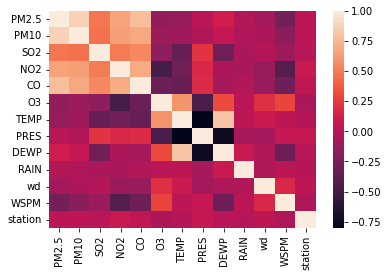

In [85]:
sns.heatmap(data.corr())

In [86]:
print(data.head(2))

    PM2.5    PM10     SO2     NO2        CO       O3     TEMP       PRES  \
0 4.00000 4.00000 4.00000 7.00000 300.00000 77.00000 -0.70000 1023.00000   
1 8.00000 8.00000 4.00000 7.00000 300.00000 77.00000 -1.10000 1023.20000   

       DEWP    RAIN  wd    WSPM  station  MDH  
0 -18.80000 0.00000   6 4.40000        0  310  
1 -18.20000 0.00000   3 4.70000        0  311  


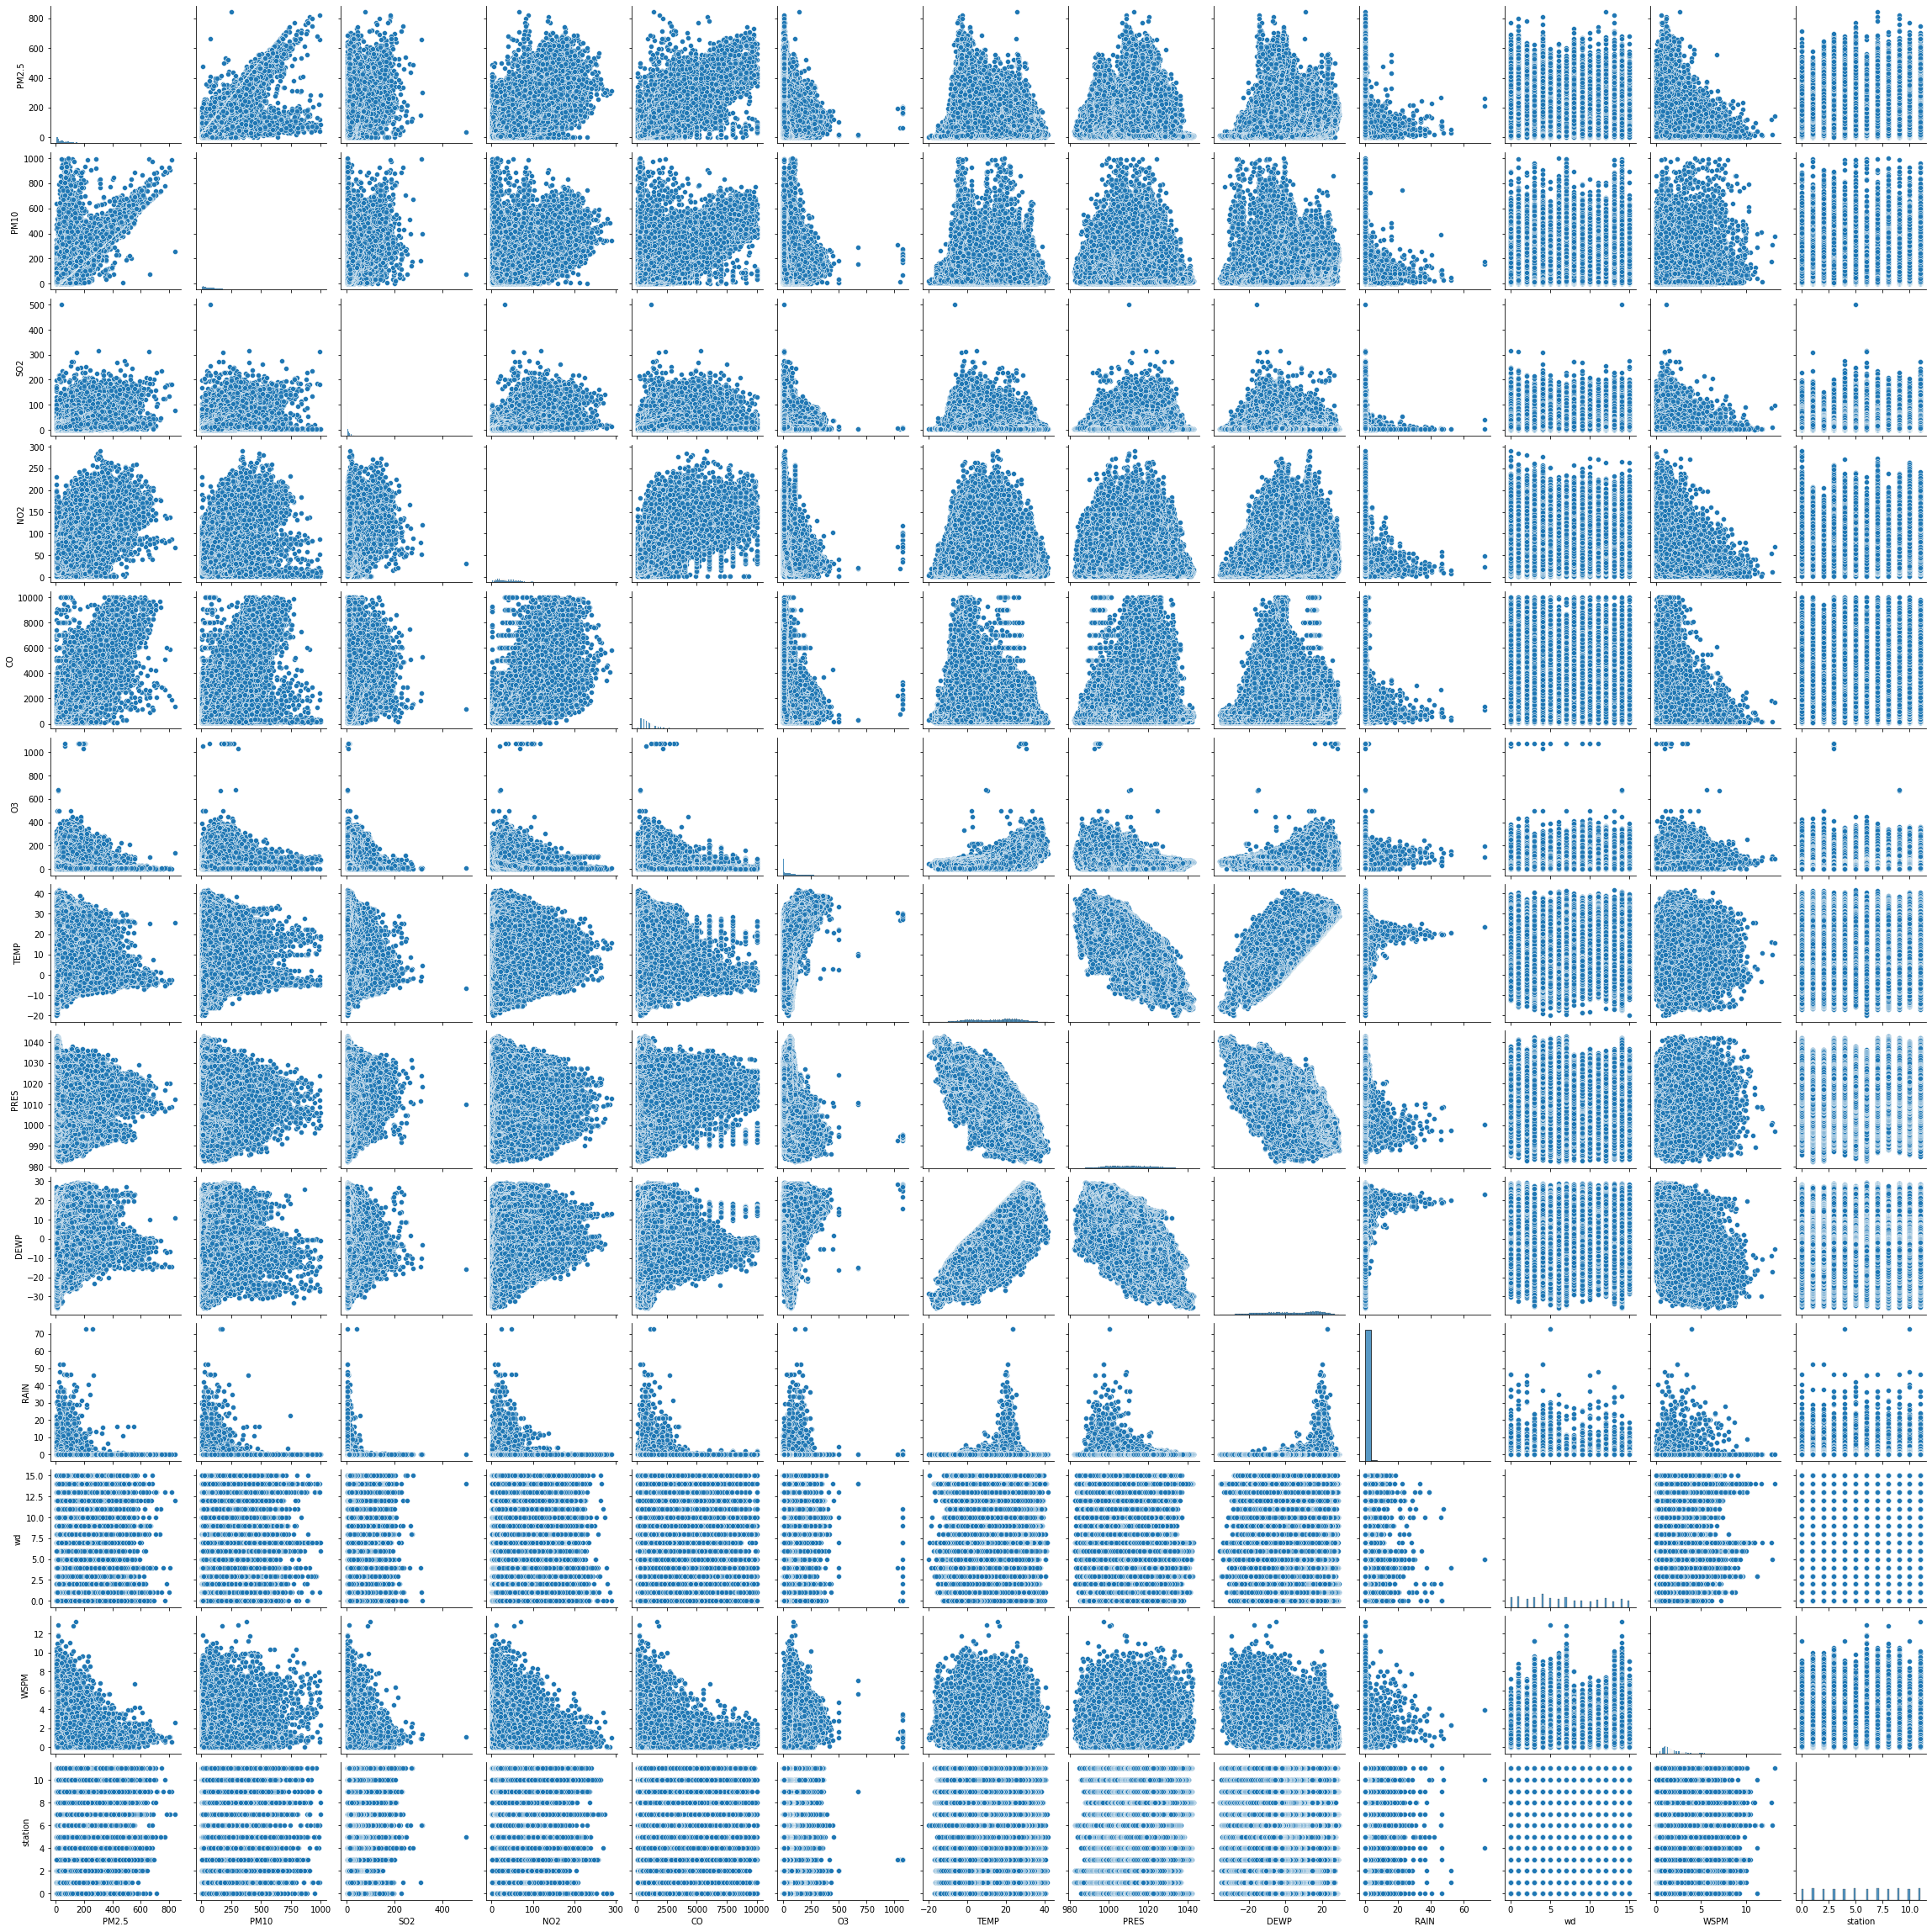

In [128]:
sns.pairplot(data)

In [87]:
y=data["PM2.5"]
y.head()

0   4.00000
1   8.00000
2   7.00000
3   6.00000
4   3.00000
Name: PM2.5, dtype: float64

In [88]:
x=pd.DataFrame(data)
x.drop("PM2.5",axis =1,inplace=True)
x.head()

PM10      SO2      NO2        CO       O3     TEMP       PRES      DEWP  \
0 4.00000  4.00000  7.00000 300.00000 77.00000 -0.70000 1023.00000 -18.80000   
1 8.00000  4.00000  7.00000 300.00000 77.00000 -1.10000 1023.20000 -18.20000   
2 7.00000  5.00000 10.00000 300.00000 73.00000 -1.10000 1023.50000 -18.20000   
3 6.00000 11.00000 11.00000 300.00000 72.00000 -1.40000 1024.50000 -19.40000   
4 3.00000 12.00000 12.00000 300.00000 72.00000 -2.00000 1025.20000 -19.50000   

     RAIN  wd    WSPM  station  MDH  
0 0.00000   6 4.40000        0  310  
1 0.00000   3 4.70000        0  311  
2 0.00000   6 5.60000        0  312  
3 0.00000   7 3.10000        0  313  
4 0.00000   3 2.00000        0  314

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 3)


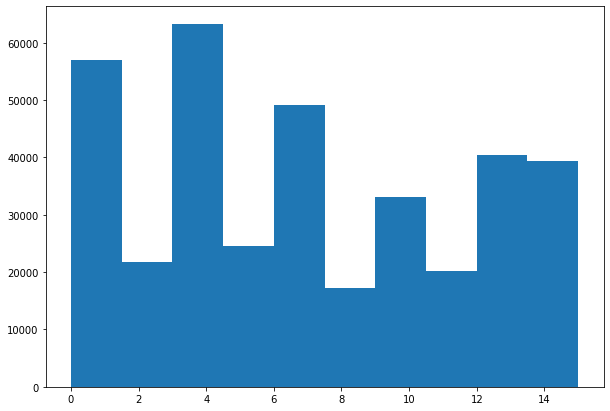

In [126]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data["wd"])
 
# Show plot
plt.show()

In [91]:



print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(292964, 13)
(292964,)
(73241, 13)
(73241,)


In [92]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = data_op
x_test = sc.transform(x_test)

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.ensemble import RandomForestRegressor

lr = RandomForestRegressor(max_depth = 17)

#param_grid = {'criterion': ['squared_error','absolute_error'],
 #                 'max_depth': list(range(2,50)),
 #              'n_estimators': list(range(2,20)),
  #               'max_features': ['auto', 'sqrt', 'log2'],
  #                'min_samples_split': list(range(5,20))}

#lr = RandomizedSearchCV(cv, param_grid, cv= 5)


lr.fit(x_train,y_train)




RandomForestRegressor(max_depth=17)

In [94]:
y_test_pred_op = lr.predict(data_op)


In [95]:
y_test_pred_op.astype('int32')
y_test_pred_op = pd.DataFrame(y_test_pred_op)

y_test_pred_op.head(2)

0
0 592.53800
1 594.57800

In [106]:

op = pd.DataFrame(data_op_ori["REF_NO"])

out = [op,y_test_pred_op]

op = pd.concat(out, axis =1)

op.set_index('REF_NO')   

#op[op.columns[1]] = op[op.columns[1]].astype("Int64")


op.head(2)


REF_NO         0
0   33649 592.53800
1   33650 594.57800

In [107]:
print(op.to_csv('/content/submission.csv', index=False, header=False))

None


In [108]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [109]:
x_test.shape

(16728, 13)

In [110]:
#print(cv.best_score_)
#print(cv.best_params_)
#print(cv.best_estimator_)

In [111]:
from sklearn import metrics
r2_train = metrics.r2_score(y_train,y_train_pred)
r2_test = metrics.r2_score(y_test,y_test_pred)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

ValueError: ignored

In [ ]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))